In [1]:
import pandas as pd
import datetime
from datetime import datetime
from plotnine import *

/Users/shelbyjouppi/.pyenv/versions/3.9.7/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
# Reading in the Google Mobility Data for Colorado from 02-2020 to 01-2022
df = pd.read_csv("google-mobility-colorado.csv")
df.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,US,United States,Colorado,Lake County,NaN,NaN,8065.0,ChIJmal-dhuaaocRMOFAC0S-1CE,2020-02-15,14.0,5.0,NaN,NaN,NaN,NaN
1,US,United States,Colorado,San Miguel County,NaN,NaN,8113.0,ChIJkZS2D5W2OIcRnCDJ-x92fYs,2020-02-15,26.0,NaN,NaN,NaN,NaN,NaN
2,US,United States,Colorado,Montrose County,NaN,NaN,8085.0,ChIJ1aUiMv9JP4cRPhYDwhgWXO0,2020-02-15,10.0,4.0,NaN,NaN,-3.0,NaN
3,US,United States,Colorado,Logan County,NaN,NaN,8075.0,ChIJKw6ag78ncocRTKB7AP51HbQ,2020-02-15,NaN,3.0,NaN,NaN,-4.0,NaN
4,US,United States,Colorado,La Plata County,NaN,NaN,8067.0,ChIJuc5xfeCiPocRfcZyScmGsxs,2020-02-15,2.0,8.0,13.0,NaN,NaN,NaN


In [3]:
# Getting the columns I'm interested in
df = df[['sub_region_2','date','parks_percent_change_from_baseline']]

# Renaming the columns
df = df.rename({'parks_percent_change_from_baseline' : 'pct_change', 'sub_region_2': 'county'}, axis=1)

In [4]:
# Converting to datetime
df['date'] = pd.to_datetime(df.date, format="%Y-%m-%d")

In [5]:
df.date.value_counts().sort_index().head(50)

2020-02-15    45
2020-02-16    45
2020-02-17    47
2020-02-18    47
2020-02-19    49
2020-02-20    48
2020-02-21    46
2020-02-22    45
2020-02-23    45
2020-02-24    47
2020-02-25    47
2020-02-26    47
2020-02-27    48
2020-02-28    47
2020-02-29    45
2020-03-01    45
2020-03-02    47
2020-03-03    47
2020-03-04    47
2020-03-05    48
2020-03-06    47
2020-03-07    45
2020-03-08    45
2020-03-09    47
2020-03-10    47
2020-03-11    48
2020-03-12    48
2020-03-13    48
2020-03-14    46
2020-03-15    45
2020-03-16    48
2020-03-17    49
2020-03-18    49
2020-03-19    49
2020-03-20    47
2020-03-21    44
2020-03-22    44
2020-03-23    48
2020-03-24    49
2020-03-25    49
2020-03-26    50
2020-03-27    46
2020-03-28    44
2020-03-29    44
2020-03-30    49
2020-03-31    50
2020-04-01    50
2020-04-02    51
2020-04-03    47
2020-04-04    44
Name: date, dtype: int64

In [6]:
# Let's extract the day of week so we can make more comparisons between years
df['day'] = df.date.dt.dayofweek

# Rename the numbers to days
def day_name(day):
    if day == 0:
        return 'Monday'
    elif day == 1:
        return 'Tuesday'
    elif day == 2:
        return 'Wednesday'
    elif day == 3:
        return 'Thursday'
    elif day == 4:
        return 'Friday'
    elif day == 5:
        return 'Saturday'
    elif day == 6:
        return 'Sunday'

df['day_name'] = df.day.apply(day_name)

In [7]:
df.head()

,county,date,pct_change,day,day_name
0,Lake County,2020-02-15,NaN,5,Saturday
1,San Miguel County,2020-02-15,NaN,5,Saturday
2,Montrose County,2020-02-15,NaN,5,Saturday
3,Logan County,2020-02-15,NaN,5,Saturday
4,La Plata County,2020-02-15,13.0,5,Saturday


In [8]:
# Let's make a month and a year column
df['month'] = df.date.dt.month
df['year'] = df.date.dt.year

In [9]:
# What season is it?

def season(month):
    if month in range(1,3):
        return 'Winter'
    elif month in range(3,6):
        return 'Spring'
    elif month in range(6,9):
        return 'Summer'
    elif month in range(9,12):
        return 'Fall'
    elif month == 12:
        return 'Winter'
    
df['season'] = df.month.apply(season)

In [10]:
df.head()

,county,date,pct_change,day,day_name,month,year,season
0,Lake County,2020-02-15,NaN,5,Saturday,2,2020,Winter
1,San Miguel County,2020-02-15,NaN,5,Saturday,2,2020,Winter
2,Montrose County,2020-02-15,NaN,5,Saturday,2,2020,Winter
3,Logan County,2020-02-15,NaN,5,Saturday,2,2020,Winter
4,La Plata County,2020-02-15,13.0,5,Saturday,2,2020,Winter


In [11]:
# Let's remove the january 2021 & 2022 data because we don't have january 2020,
# and we don't have enough 2022 data
# Data starts at 2/15, so should we also cut out the first 14 days of Febraury 2021?
df = df[(df.month != 1)]

In [33]:
# Let's look at how many data points we have for each county for each year
# This might inform which counties we choose to look at
df[df['pct_change'].notnull()].groupby('year').county.value_counts()

year  county            
2020  Denver County         319
      Jefferson County      317
      El Paso County        308
      Boulder County        301
      Arapahoe County       299
      Adams County          297
      Pueblo County         295
      Grand County          291
      Weld County           291
      Larimer County        289
      Broomfield County     288
      Mesa County           287
      Summit County         275
      Douglas County        265
      Eagle County          244
      Routt County          183
      Garfield County       119
      Park County           109
      Gunnison County        66
      Morgan County          65
      Clear Creek County     43
      Fremont County         38
      Delta County           30
      La Plata County        23
      Chaffee County         15
2021  Grand County          334
      Mesa County           334
      Pueblo County         334
      Arapahoe County       333
      Adams County          332
      Boulder C

In [25]:
# Choosing the top counties with the most data points
top_counties = ['Denver County',
            'Jefferson County',
            'El Paso County',
            'Boulder County',
            'Arapahoe County',
            'Adams County',
            'Pueblo County',
            'Grand County',
            'Weld County',
            'Larimer County',
            'Broomfield County',
            'Mesa County',
            'Summit County',
            'Douglas County',
            'Eagle County',
            'Routt County']

In [31]:
top_counties_df = df[df.county.isin(top_counties)]

/Users/shelbyjouppi/.pyenv/versions/3.9.7/lib/python3.9/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 774 rows containing missing values.


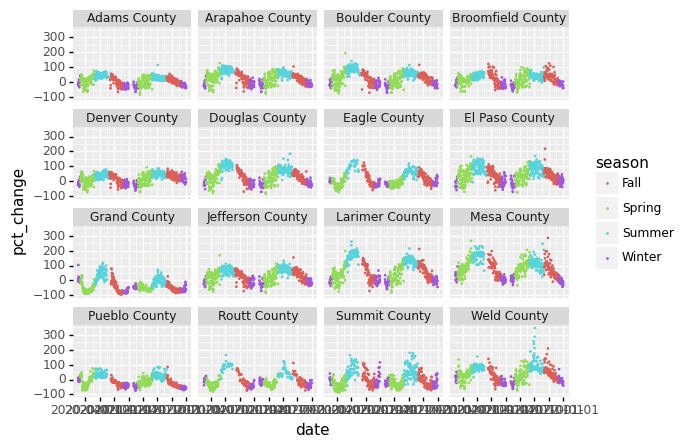

<ggplot: (342090569)>

In [34]:
(
    ggplot(top_counties_df,
          aes(x='date', y='pct_change', color='season'))
        + geom_point(size=.1)
        + facet_wrap('county')
)

In [81]:
# To assess the median, I'm getting how many days with non-null values.
count_days = top_counties_df[top_counties_df["pct_change"].notnull()].groupby(['season', 'day_name', 'year', 'county']).day.value_counts().to_frame().sort_index()

In [84]:
count_days = count_days.rename({'day':'count'},axis=1).reset_index()

In [85]:
count_days

,season,day_name,year,county,day,count
0,Fall,Friday,2020,Adams County,4,11
1,Fall,Friday,2020,Arapahoe County,4,12
2,Fall,Friday,2020,Boulder County,4,12
3,Fall,Friday,2020,Broomfield County,4,12
4,Fall,Friday,2020,Denver County,4,13
...,...,...,...,...,...,...
873,Winter,Wednesday,2021,Mesa County,2,9
874,Winter,Wednesday,2021,Pueblo County,2,9
875,Winter,Wednesday,2021,Routt County,2,5
876,Winter,Wednesday,2021,Summit County,2,8


In [91]:
count_days.sort_values('count').head(20)

,season,day_name,year,county,day,count
632,Summer,Wednesday,2020,Eagle County,2,1
593,Summer,Thursday,2021,Routt County,3,1
492,Summer,Monday,2021,Eagle County,0,2
701,Winter,Monday,2020,Routt County,0,2
693,Winter,Monday,2020,Douglas County,0,2
609,Summer,Tuesday,2020,Summit County,1,2
602,Summer,Tuesday,2020,Eagle County,1,2
639,Summer,Wednesday,2020,Summit County,2,3
571,Summer,Thursday,2020,Eagle County,3,4
201,Fall,Wednesday,2020,Routt County,2,4


In [140]:
# Getting the median percent for each day of the season, by county and year.
day_avg = top_counties_df.groupby(['season', 'day_name','day', 'year', 'county'])['pct_change'].mean().to_frame().reset_index()
day_avg

,season,day_name,day,year,county,pct_change
0,Fall,Friday,4,2020,Adams County,17.727273
1,Fall,Friday,4,2020,Arapahoe County,39.666667
2,Fall,Friday,4,2020,Boulder County,26.000000
3,Fall,Friday,4,2020,Broomfield County,22.166667
4,Fall,Friday,4,2020,Denver County,16.384615
...,...,...,...,...,...,...
891,Winter,Wednesday,2,2021,Mesa County,9.333333
892,Winter,Wednesday,2,2021,Pueblo County,-47.555556
893,Winter,Wednesday,2,2021,Routt County,-27.800000
894,Winter,Wednesday,2,2021,Summit County,4.875000


In [141]:
# Merging Count_Day with Day_Median
day_avg = day_avg.merge(count_days, how='left', left_on=['season', 'day_name','year','county'], right_on=['season', 'day_name','year','county'])

In [142]:
day_avg.head()

,season,day_name,day_x,year,county,pct_change,day_y,count
0,Fall,Friday,4,2020,Adams County,17.727273,4.0,11.0
1,Fall,Friday,4,2020,Arapahoe County,39.666667,4.0,12.0
2,Fall,Friday,4,2020,Boulder County,26.000000,4.0,12.0
3,Fall,Friday,4,2020,Broomfield County,22.166667,4.0,12.0
4,Fall,Friday,4,2020,Denver County,16.384615,4.0,13.0


In [143]:
# Renaming columns to be most accurate
day_avg = day_avg.rename({'day_x':'day', 'pct_change': 'avg_pct_change_baseline', 'count': 'day_count'},axis=1).drop(columns=['day_y'])
day_avg.head()

,season,day_name,day,year,county,avg_pct_change_baseline,day_count
0,Fall,Friday,4,2020,Adams County,17.727273,11.0
1,Fall,Friday,4,2020,Arapahoe County,39.666667,12.0
2,Fall,Friday,4,2020,Boulder County,26.000000,12.0
3,Fall,Friday,4,2020,Broomfield County,22.166667,12.0
4,Fall,Friday,4,2020,Denver County,16.384615,13.0


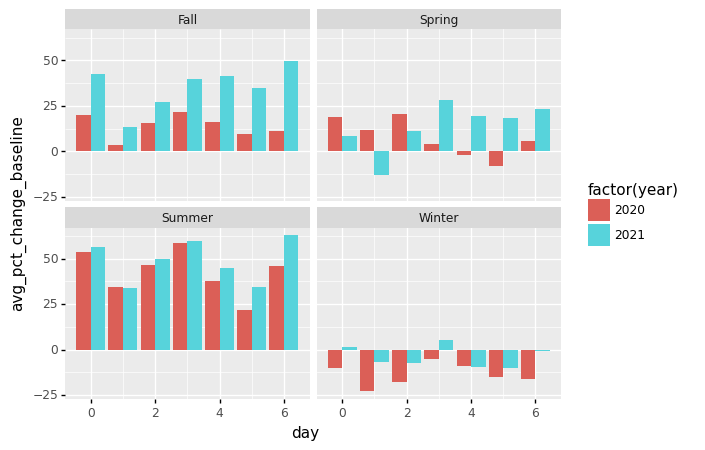

<ggplot: (343889752)>

In [144]:
# How does that look? Wow so different from my previous graphs!
# Winter & Spring Thursdays is a very big change. Should look more closely into that
# However overall the median days does show more activity in the winter (negative change is lower)
# Seems 
(
    ggplot(day_avg.query('county == "Denver County"'),
          aes('day', 'avg_pct_change_baseline', fill='factor(year)'))
          + geom_bar(stat='identity', position='dodge')
          + facet_wrap('season')
          
)

In [293]:
day_avg

,season,day_name,day,year,county,avg_pct_change_baseline,day_count,diff,year_pct_change
0,Fall,Friday,4,2020,Adams County,17.727273,11.0,NaN,NaN
1,Fall,Friday,4,2020,Arapahoe County,39.666667,12.0,65.556,-253.2
2,Fall,Friday,4,2020,Boulder County,26.000000,12.0,41.778,-264.8
3,Fall,Friday,4,2020,Broomfield County,22.166667,12.0,40.278,-222.4
4,Fall,Friday,4,2020,Denver County,16.384615,13.0,35.274,-186.7
...,...,...,...,...,...,...,...,...,...
891,Winter,Wednesday,2,2021,Mesa County,9.333333,9.0,-9.238,-49.7
892,Winter,Wednesday,2,2021,Pueblo County,-47.555556,9.0,-19.698,70.7
893,Winter,Wednesday,2,2021,Routt County,-27.800000,5.0,6.950,-20.0
894,Winter,Wednesday,2,2021,Summit County,4.875000,8.0,-10.268,-67.8


## Calculating difference in median pct_change per day, season & county

EG Taking the median percent_change for Winter Saturdays in 2020 and subtracting it from median percent_change for Winter Saturdays in 2021.

In [149]:
# Subtracting each row from the row before it. Will filter out 2020 so I only get 2021-2020.
day_avg['diff'] = day_avg.sort_values(['county','season']).avg_pct_change_baseline.diff(periods=1).round(3)

In [146]:
day_avg['year_pct_change'] = day_avg.sort_values(['county','season']).avg_pct_change_baseline.pct_change(periods=1)

In [147]:
day_avg['year_pct_change'] = day_avg['year_pct_change'].round(3)*100

In [150]:
day_avg.sort_values(['county', 'season'])

,season,day_name,day,year,county,avg_pct_change_baseline,day_count,diff,year_pct_change
0,Fall,Friday,4,2020,Adams County,17.727273,11.0,NaN,NaN
16,Fall,Friday,4,2021,Adams County,21.384615,13.0,3.657,20.6
32,Fall,Monday,0,2020,Adams County,4.000000,12.0,-17.385,-81.3
48,Fall,Monday,0,2021,Adams County,12.461538,13.0,8.462,211.5
64,Fall,Saturday,5,2020,Adams County,8.076923,13.0,-4.385,-35.2
...,...,...,...,...,...,...,...,...,...
831,Winter,Thursday,3,2021,Weld County,-9.555556,9.0,-0.984,11.5
847,Winter,Tuesday,1,2020,Weld County,-23.166667,6.0,-13.611,142.4
863,Winter,Tuesday,1,2021,Weld County,-13.333333,6.0,9.833,-42.4
879,Winter,Wednesday,2,2020,Weld County,-22.500000,6.0,-9.167,68.8


In [152]:
day_avg.query('year != 2020').sort_values(['county','season'])

,season,day_name,day,year,county,avg_pct_change_baseline,day_count,diff,year_pct_change
16,Fall,Friday,4,2021,Adams County,21.384615,13.0,3.657,20.6
48,Fall,Monday,0,2021,Adams County,12.461538,13.0,8.462,211.5
80,Fall,Saturday,5,2021,Adams County,15.230769,13.0,7.154,88.6
112,Fall,Sunday,6,2021,Adams County,0.461538,13.0,8.615,-105.7
144,Fall,Thursday,3,2021,Adams County,14.923077,13.0,8.378,128.0
...,...,...,...,...,...,...,...,...,...
767,Winter,Saturday,5,2021,Weld County,-9.857143,7.0,-21.857,-182.1
799,Winter,Sunday,6,2021,Weld County,-22.625000,8.0,-8.292,57.8
831,Winter,Thursday,3,2021,Weld County,-9.555556,9.0,-0.984,11.5
863,Winter,Tuesday,1,2021,Weld County,-13.333333,6.0,9.833,-42.4


In [156]:
# Narrowing counties to metro Denver
counties = ['Denver County', 'Boulder County', 'Douglas County', 'Arapahoe County', 'Adams County', 'Weld County', 'El Paso County', 'Jefferson County', 'Larimer County']
metro = day_avg[day_avg.county.isin(counties)]

In [175]:
metro.sort_values(['county','season']).head(30)

,season,day_name,day,year,county,pct_change,diff
0,Fall,Friday,4,2020,Adams County,17.0,NaN
47,Fall,Friday,4,2021,Adams County,24.0,7.0
94,Fall,Monday,0,2020,Adams County,6.0,-18.0
142,Fall,Monday,0,2021,Adams County,19.0,13.0
190,Fall,Saturday,5,2020,Adams County,14.0,-5.0
230,Fall,Saturday,5,2021,Adams County,14.0,0.0
271,Fall,Sunday,6,2020,Adams County,-12.0,-26.0
310,Fall,Sunday,6,2021,Adams County,4.0,16.0
349,Fall,Thursday,3,2020,Adams County,7.0,3.0
398,Fall,Thursday,3,2021,Adams County,16.0,9.0


In [125]:
day_median.query('county == "Boulder County"')

,season,day_name,day,year,county,median_pct_change_baseline,day_count,diff,year_pct_change
2,Fall,Friday,4,2020,Boulder County,23.5,12.0,46.5,-202.2
18,Fall,Friday,4,2021,Boulder County,39.0,13.0,15.5,66.0
34,Fall,Monday,0,2020,Boulder County,31.0,12.0,-8.0,-20.5
50,Fall,Monday,0,2021,Boulder County,53.0,13.0,22.0,71.0
66,Fall,Saturday,5,2020,Boulder County,37.0,13.0,-16.0,-30.2
82,Fall,Saturday,5,2021,Boulder County,37.0,13.0,0.0,0.0
98,Fall,Sunday,6,2020,Boulder County,5.0,13.0,-32.0,-86.5
114,Fall,Sunday,6,2021,Boulder County,25.0,13.0,20.0,400.0
130,Fall,Thursday,3,2020,Boulder County,25.0,10.0,0.0,0.0
146,Fall,Thursday,3,2021,Boulder County,28.0,13.0,3.0,12.0


In [130]:
# Wow these readings are alll over the map. The median doesn't appear to be a good metric
df.query('county == "Boulder County" & day_name == "Saturday" & season == "Winter"')

,county,date,pct_change,day,day_name,month,year,season
9,Boulder County,2020-02-15,-20.0,5,Saturday,2,2020,Winter
370,Boulder County,2020-02-22,4.0,5,Saturday,2,2020,Winter
670,Boulder County,2020-02-29,7.0,5,Saturday,2,2020,Winter
12909,Boulder County,2020-12-05,-1.0,5,Saturday,12,2020,Winter
13230,Boulder County,2020-12-12,-51.0,5,Saturday,12,2020,Winter
13553,Boulder County,2020-12-19,-33.0,5,Saturday,12,2020,Winter
13882,Boulder County,2020-12-26,3.0,5,Saturday,12,2020,Winter
15785,Boulder County,2021-02-06,-20.0,5,Saturday,2,2021,Winter
16127,Boulder County,2021-02-13,-69.0,5,Saturday,2,2021,Winter
16431,Boulder County,2021-02-20,-23.0,5,Saturday,2,2021,Winter


In [131]:
df.query('county == "Boulder County" & day_name == "Saturday" & season == "Winter"').groupby('year')['pct_change'].median()

year
2020    -1.0
2021   -26.5
Name: pct_change, dtype: float64

In [132]:
df.query('county == "Boulder County" & day_name == "Saturday" & season == "Winter"').groupby('year')['pct_change'].mean()

year
2020   -13.0
2021   -27.5
Name: pct_change, dtype: float64

In [244]:
weekday_avg = day_avg[day_avg.day.isin(weekdays)]
weekend_avg = day_avg[day_avg.day.isin(weekend)]

In [248]:
weekday_avg.to_csv('colorado-parks-weekday-averages.csv', index=False)

/Users/shelbyjouppi/.pyenv/versions/3.9.7/lib/python3.9/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_bar : Removed 12 rows containing missing values.


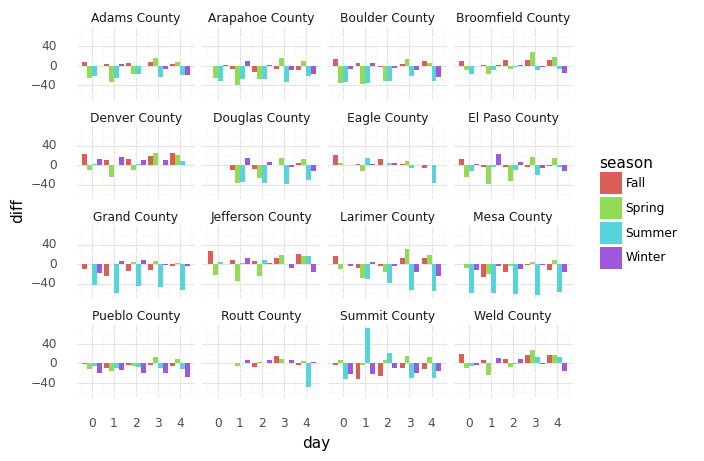

<ggplot: (344068795)>

In [245]:
( 
    ggplot(weekday_avg.query('year != 2020').sort_values(['county','season']),
          aes('day', 'diff', fill='season'))
        + geom_bar(stat='identity', position='dodge')
        + facet_wrap('county')
        + theme(figure_size=(16, 9))
        + theme_minimal()
)

In [250]:
day_avg.to_csv('colorado-parks-alldays-average.csv', index=False)

## Plotting the change in percent change from 2020-2021 by day and season
-----

* 0 = Monday
* 6 = Sunday

/Users/shelbyjouppi/.pyenv/versions/3.9.7/lib/python3.9/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_bar : Removed 12 rows containing missing values.


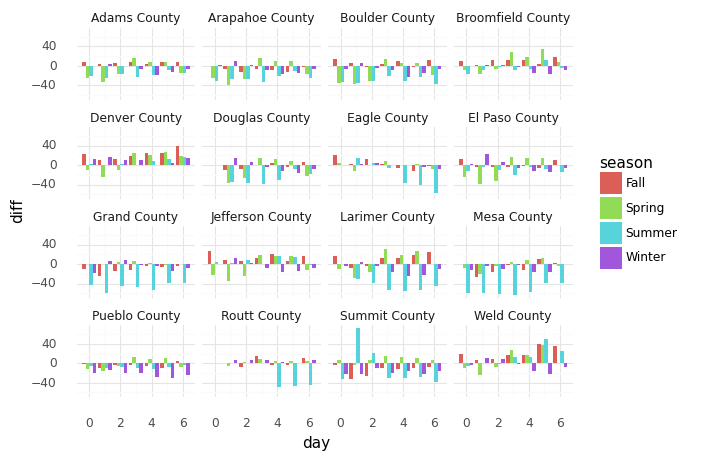

<ggplot: (342835390)>

In [154]:
( 
    ggplot(day_avg.query('year != 2020').sort_values(['county','season']),
          aes('day', 'diff', fill='season'))
        + geom_bar(stat='identity', position='dodge')
        + facet_wrap('county')
        + theme(figure_size=(16, 9))
        + theme_minimal()
)

### Visualizing the change by day and season

/Users/shelbyjouppi/.pyenv/versions/3.9.7/lib/python3.9/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_bar : Removed 2 rows containing missing values.


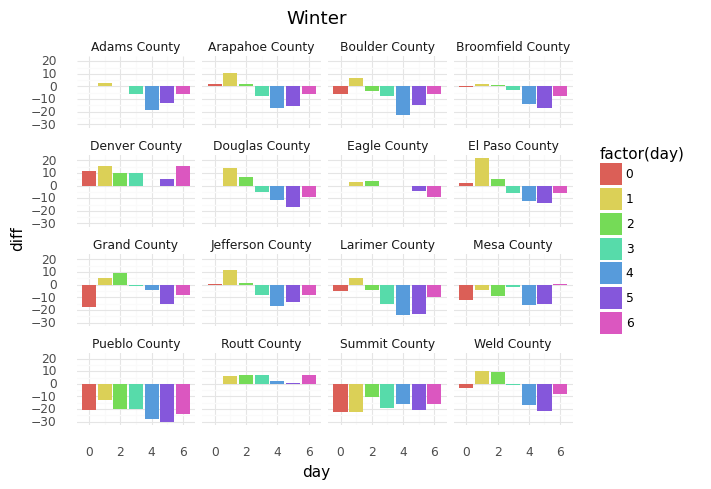

<ggplot: (343972690)>

In [155]:
( 
    ggplot(day_avg.query('year != 2020 & season == "Winter"').sort_values(['county','season']),
          aes('day', 'diff', fill='factor(day)'))
        + geom_bar(stat='identity', position='dodge')
        + facet_wrap('county')
        + theme(figure_size=(16, 9))
        + theme_minimal()
        + labs(title="Winter")
)

/Users/shelbyjouppi/.pyenv/versions/3.9.7/lib/python3.9/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_bar : Removed 6 rows containing missing values.


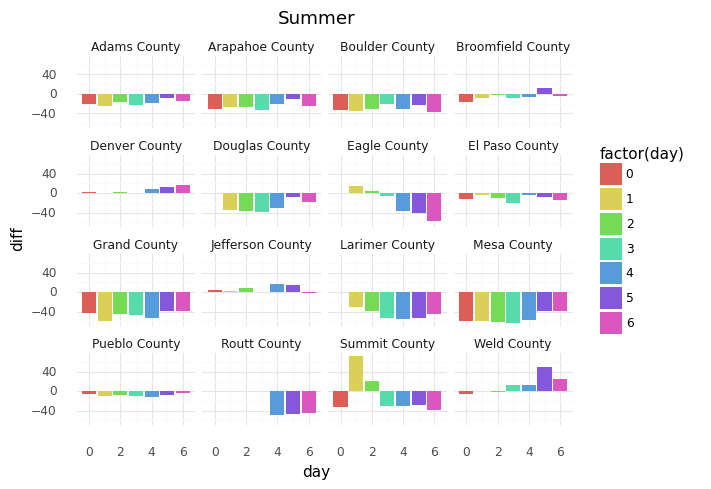

<ggplot: (341038123)>

In [156]:
( 
    ggplot(day_avg.query('year != 2020 & season == "Summer"').sort_values(['county','season']),
          aes('day', 'diff', fill='factor(day)'))
        + geom_bar(stat='identity', position='dodge')
        + facet_wrap('county')
        + theme(figure_size=(16, 9))
        + theme_minimal()
        + labs(title="Summer")
)

/Users/shelbyjouppi/.pyenv/versions/3.9.7/lib/python3.9/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_bar : Removed 2 rows containing missing values.


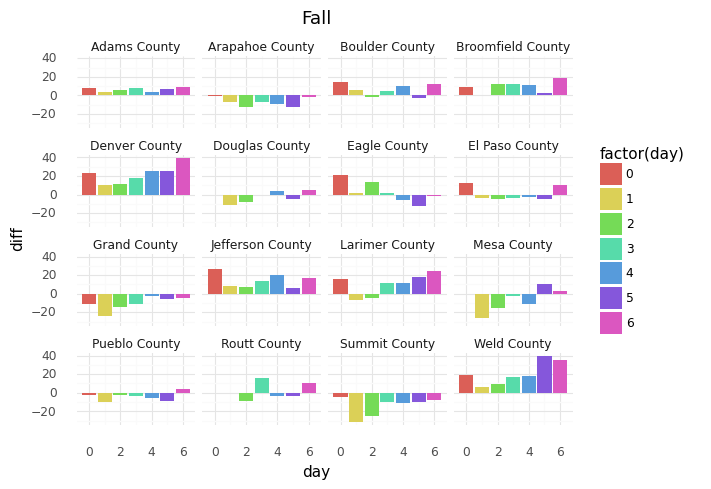

<ggplot: (344106957)>

In [157]:
( 
    ggplot(day_avg.query('year != 2020 & season == "Fall"').sort_values(['county','season']),
          aes('day', 'diff', fill='factor(day)'))
        + geom_bar(stat='identity', position='dodge')
        + facet_wrap('county')
        + theme(figure_size=(16, 9))
        + theme_minimal()
        + labs(title="Fall")
)

/Users/shelbyjouppi/.pyenv/versions/3.9.7/lib/python3.9/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_bar : Removed 2 rows containing missing values.


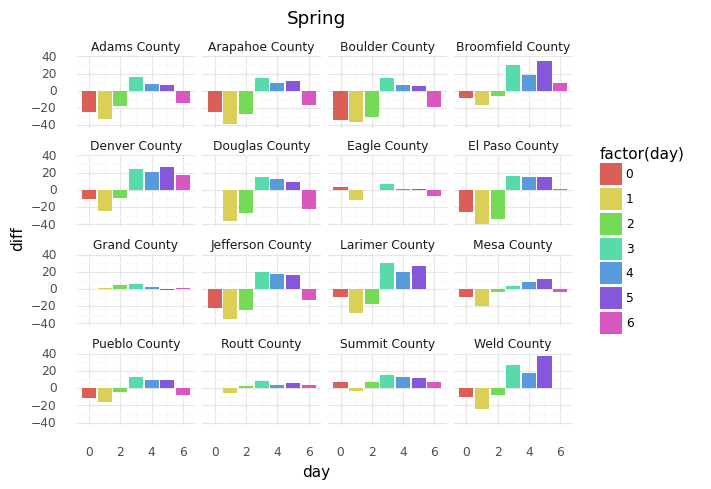

<ggplot: (342908290)>

In [158]:
( 
    ggplot(day_avg.query('year != 2020 & season == "Spring"').sort_values(['county','season']),
          aes('day', 'diff', fill='factor(day)'))
        + geom_bar(stat='identity', position='dodge')
        + facet_wrap('county')
        + theme(figure_size=(16, 9))
        + theme_minimal()
        + labs(title="Spring")
)

In [165]:
day_diff = day_avg.query('year == 2021')[['county','season','day_name','diff']].copy()

In [168]:
day_diff.county.value_counts()

Adams County         28
Arapahoe County      28
Boulder County       28
Broomfield County    28
Denver County        28
Douglas County       28
Eagle County         28
El Paso County       28
Grand County         28
Jefferson County     28
Larimer County       28
Mesa County          28
Pueblo County        28
Routt County         28
Summit County        28
Weld County          28
Name: county, dtype: int64

In [170]:
def fips(county):
    if county == 'Adams County':
        return '001'
    elif county == 'Arapahoe County':
        return '005'
    elif county == 'Boulder County':
        return '013'
    elif county == 'Broomfield County':
        return '014'
    elif county == 'Denver County':
        return '031'
    elif county == 'Douglas County':
        return '035'
    elif county == 'Eagle County':
        return '037'
    elif county == 'El Paso County':
        return '041'
    elif county == 'Grand County':
        return '049'
    elif county == 'Jefferson County':
        return '059'
    elif county == 'Larimer County':
        return '069'
    elif county == 'Mesa County':
        return '077'
    elif county == 'Pueblo County':
        return '101'
    elif county == 'Routt County':
        return '107'
    elif county == 'Summit County':
        return '117'
    elif county == 'Weld County':
        return '123'

In [171]:
day_diff['fips'] = day_diff.county.apply(fips)

In [173]:
day_diff.to_csv('co-parks-mobility-differences.csv',index=False)

## Getting an average for the entire season

In [232]:
season_avg = top_counties_df.groupby(['season', 'year', 'county'])['pct_change'].mean().round(2).to_frame().reset_index()

In [234]:
season_avg['year_pct_change'] = season_avg.sort_values(['county','season'])['pct_change'].pct_change(periods=1).round(2)

In [237]:
# Subtracting each row from the row before it. Will filter out 2020 so I only get 2021-2020.
season_avg['year_pct_change'] = season_avg.sort_values(['county','season'])['pct_change'].pct_change(periods=1).round(2)*100

,season,year,county,pct_change,year_pct_change
0,Fall,2020,Adams County,2.55,NaN
16,Fall,2021,Adams County,9.42,269.0
32,Spring,2020,Adams County,11.29,20.0
48,Spring,2021,Adams County,3.18,-72.0
64,Summer,2020,Adams County,46.15,1351.0
80,Summer,2021,Adams County,28.40,-38.0
96,Winter,2020,Adams County,-19.51,-169.0
112,Winter,2021,Adams County,-24.97,28.0
1,Fall,2020,Arapahoe County,30.67,-223.0
17,Fall,2021,Arapahoe County,23.69,-23.0


In [240]:
season_avg['fips'] = season_avg.county.apply(fips)

In [241]:
season_avg.to_csv('colorado-parks-season-change.csv', index=False)

In [183]:
season_diff = season_avg.query('year == 2021')

In [184]:
season_diff['fips'] = season_diff.county.apply(fips)

/var/folders/_4/_njb58q944xdbv6xcbzbzmqh0000gn/T/ipykernel_1848/3339833856.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [312]:
season_diff.sort_values(['county','year','season'])

,season,year,county,pct_change,diff,fips
16,Fall,2021,Adams County,9.42,6.87,001
17,Fall,2021,Arapahoe County,23.69,-6.98,005
18,Fall,2021,Boulder County,27.59,6.19,013
19,Fall,2021,Broomfield County,32.62,7.73,014
20,Fall,2021,Denver County,35.52,21.59,031
...,...,...,...,...,...,...
123,Winter,2021,Mesa County,5.64,-8.83,077
124,Winter,2021,Pueblo County,-51.02,-22.06,101
125,Winter,2021,Routt County,-27.38,3.09,107
126,Winter,2021,Summit County,-24.12,-18.77,117


In [199]:
season_diff.to_csv('colorado-parks-season-difference.csv', index=False)

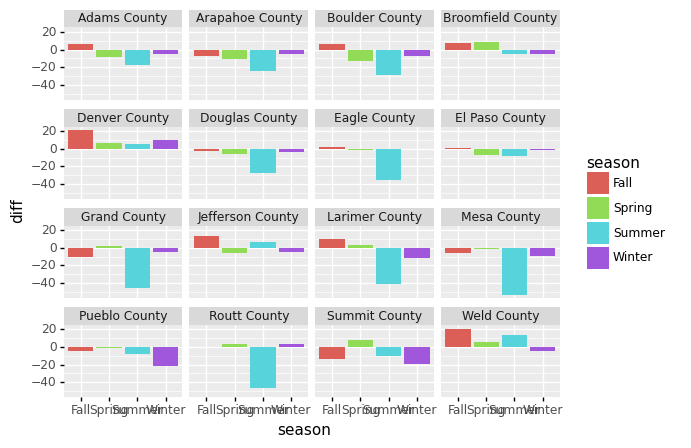

<ggplot: (342183482)>

In [204]:
(
    ggplot(season_diff,
          aes(x = 'season', y = 'diff', fill='season'))
        + geom_bar(stat='identity', position='dodge')
        + facet_wrap('county')
)

## Getting a weekend and weekday average

In [190]:
weekdays = [0,1,2,3,4]
weekend = [5,6]

In [193]:
weekday_avg = top_counties_df[top_counties_df.day.isin(weekdays)]
weekday_avg = weekday_avg.groupby(['season', 'year', 'county'])['pct_change'].mean().round(2).to_frame().reset_index()
weekend_avg = top_counties_df[top_counties_df.day.isin(weekend)]
weekend_avg = weekend_avg.groupby(['season', 'year', 'county'])['pct_change'].mean().round(2).to_frame().reset_index()

In [195]:
# Subtracting each row from the row before it. Will filter out 2020 so I only get 2021-2020.
weekday_avg['diff'] = weekday_avg.sort_values(['county','season'])['pct_change'].diff(periods=1).round(2)
weekend_avg['diff'] = weekend_avg.sort_values(['county','season'])['pct_change'].diff(periods=1).round(2)

In [196]:
weekday_diff = weekday_avg.query('year == 2021')
weekend_diff = weekend_avg.query('year == 2021')

In [197]:
weekend_diff['fips'] = weekend_diff.county.apply(fips)
weekday_diff['fips'] = weekday_diff.county.apply(fips)

/var/folders/_4/_njb58q944xdbv6xcbzbzmqh0000gn/T/ipykernel_1848/2028637622.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/_4/_njb58q944xdbv6xcbzbzmqh0000gn/T/ipykernel_1848/2028637622.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [198]:
weekend_diff.to_csv('colorado-parks-weekend-difference.csv', index=False)
weekday_diff.to_csv('colorado-parks-weekday-difference.csv', index=False)

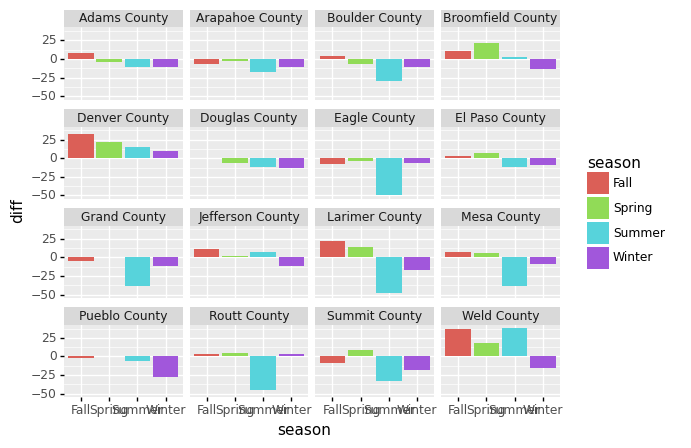

<ggplot: (343201079)>

In [205]:
(
    ggplot(weekend_diff,
          aes(x = 'season', y = 'diff', fill='season'))
        + geom_bar(stat='identity', position='dodge')
        + facet_wrap('county')
)

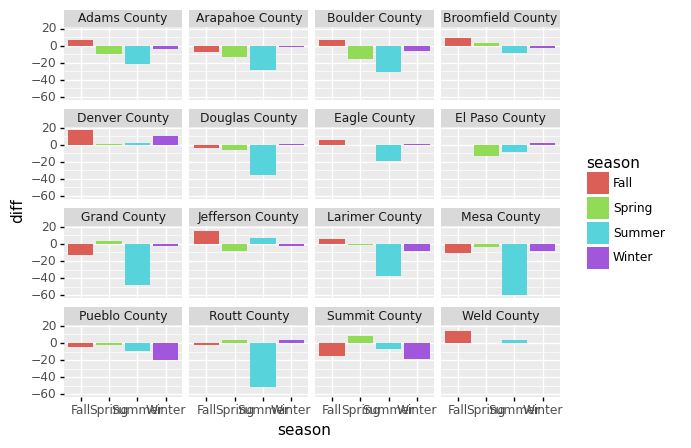

<ggplot: (342596039)>

In [206]:
(
    ggplot(weekday_diff,
          aes(x = 'season', y = 'diff', fill='season'))
        + geom_bar(stat='identity', position='dodge')
        + facet_wrap('county')
)

## Calculating the median percent change per season, instead of day

In [200]:
metro_df = df[df.county.isin(counties)]

In [242]:
metro_season_median = metro_df.groupby(['county', 'season','year'])['pct_change'].median().reset_index()

In [243]:
metro_season_median['diff'] = metro_season_median['pct_change'].diff(periods=1)

### Plotting the change in percent change per season only

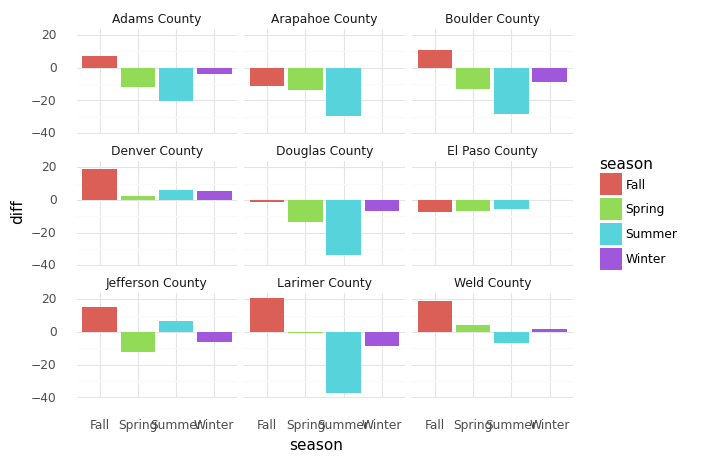

<ggplot: (345999945)>

In [244]:
(
    ggplot(metro_season_median.query('year != 2020'),
           aes('season', 'diff', fill='season'))
        +  geom_bar(stat='identity')
        +  facet_wrap('county')
        + theme(figure_size=(16, 9))
        + theme_minimal()
)

In [235]:
df.query('county == "Larimer County" & season == "Summer" & year == 2020')['pct_change'].isnull().value_counts()

False    71
True     21
Name: pct_change, dtype: int64

In [234]:
df.query('county == "Larimer County" & season == "Summer" & year == 2021')['pct_change'].isnull().value_counts()

False    92
Name: pct_change, dtype: int64

season
Fall      AxesSubplot(0.125,0.125;0.775x0.755)
Spring    AxesSubplot(0.125,0.125;0.775x0.755)
Summer    AxesSubplot(0.125,0.125;0.775x0.755)
Winter    AxesSubplot(0.125,0.125;0.775x0.755)
Name: pct_change, dtype: object

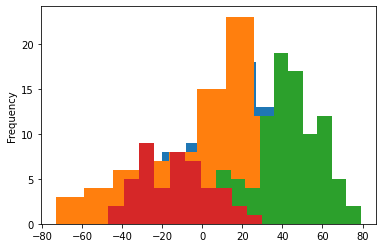

In [254]:
df.query('county == "Denver County" & year == 2020').groupby('season')['pct_change'].plot(kind='hist')

In [252]:
df.query('county == "Denver County" & year == 2020')['pct_change'].median()

20.0

# Looking at google search trends for:

* park near me
* trails near me
* playground

I used 'playground near me' but it came up as zero, so I'll just use playground for now

NameError: name 'search' is not defined

In [255]:
search = pd.read_csv("parks-trails-playgrounds-google-search.csv")
search

,,,Category: All categories
Week,park near me: (Denver CO),trails near me: (Denver CO),playground: (Denver CO)
2019-01-06,17,1,8
2019-01-13,12,5,8
2019-01-20,17,5,9
2019-01-27,19,5,8
...,...,...,...
2021-11-28,15,7,7
2021-12-05,15,0,7
2021-12-12,23,2,7
2021-12-19,21,2,6


In [256]:
# Dropping first record and renaming columns
search = search.drop(index='Week').reset_index()

/Users/shelbyjouppi/.pyenv/versions/3.9.7/lib/python3.9/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.


In [257]:
# Renaming the columns
search = search.rename({'level_0': 'week', 'level_1': 'park_near_me', 'level_2': 'trails_near_me', 'Category: All categories': 'playground'}, axis=1)

In [258]:
search

,week,park_near_me,trails_near_me,playground
0,2019-01-06,17,1,8
1,2019-01-13,12,5,8
2,2019-01-20,17,5,9
3,2019-01-27,19,5,8
4,2019-02-03,10,5,5
...,...,...,...,...
151,2021-11-28,15,7,7
152,2021-12-05,15,0,7
153,2021-12-12,23,2,7
154,2021-12-19,21,2,6


In [260]:
search['week'] = pd.to_datetime(search.week, format='%Y-%m-%d')

In [111]:
# Getting long data
search = pd.melt(search, id_vars=['week'], value_vars=['park_near_me', 'trails_near_me', 'playground'])

In [112]:
# Renaming the column
search = search.rename({'variable': 'search_term'}, axis=1)

In [113]:
# Formatting the data types, making new columns
search = search.astype({'value': 'int'})
search['week'] = pd.to_datetime(search.week, format='%Y-%m-%d')
search['month'] = search.week.dt.month
search['season'] = search.month.apply(season)

In [114]:
search

,week,search_term,value,month,season
0,2019-01-06,park_near_me,17,1,Winter
1,2019-01-13,park_near_me,12,1,Winter
2,2019-01-20,park_near_me,17,1,Winter
3,2019-01-27,park_near_me,19,1,Winter
4,2019-02-03,park_near_me,10,2,Winter
...,...,...,...,...,...
463,2021-11-28,playground,7,11,Fall
464,2021-12-05,playground,7,12,Winter
465,2021-12-12,playground,7,12,Winter
466,2021-12-19,playground,6,12,Winter


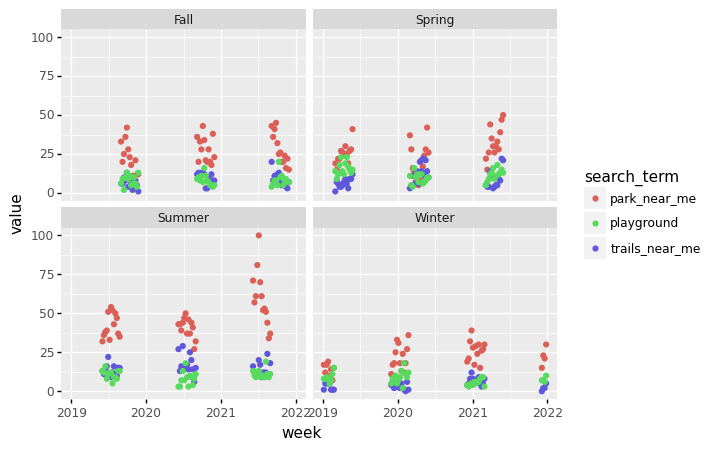

<ggplot: (345388957)>

In [124]:
import numpy as np
from mizani.breaks import date_breaks
from mizani.formatters import date_format

( 
    ggplot(search,
          aes('week', 'value', color='search_term'))
        + geom_point()
        + facet_wrap('season')
        + scale_x_datetime(breaks=date_breaks('1 year'), labels=date_format('%Y'))
)

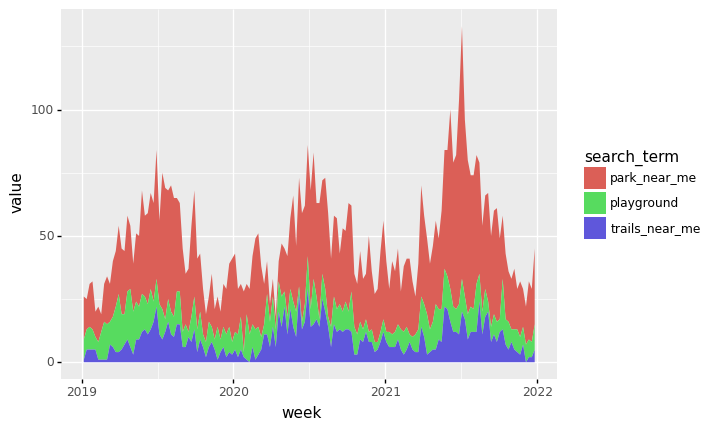

<ggplot: (345197550)>

In [119]:
( 
    ggplot(search,
          aes('week', 'value', fill='search_term'))
        + geom_area()
        + scale_x_datetime(breaks=date_breaks('1 year'), labels=date_format('%Y'))
)

In [265]:
search['month'] = search.week.dt.month
search['year'] = search.week.dt.year

In [279]:
search = search.astype({'park_near_me': 'int', 'trails_near_me': 'int'})

In [285]:
monthly_avg_park_search = search.groupby(['year', 'month']).park_near_me.mean().to_frame().reset_index()

In [286]:
monthly_avg_trail_search = search.groupby(['year', 'month']).trails_near_me.mean().to_frame().reset_index()

In [288]:
monthly_avg_search = monthly_avg_park_search.merge(monthly_avg_trail_search, how='left', left_on=['year','month'], right_on=['year','month'])

In [292]:
monthly_avg_search.to_csv('google-search-month-average.csv', index=False)

In [301]:
def month_name (month):
    if month == 1:
        return 'January'
    if month == 2:
        return 'February'
    if month == 3:
        return 'March'
    if month == 4:
        return 'April'
    if month == 5:
        return 'May'
    if month == 6:
        return 'June'
    if month == 7:
        return 'July'
    if month == 8:
        return 'August'
    if month == 9:
        return 'September'
    if month == 10:
        return 'October'
    if month == 11:
        return 'November'
    if month == 12:
        return 'December'

In [304]:
top_counties_df['month_name'] = top_counties_df.month.apply(month_name)

/var/folders/_4/_njb58q944xdbv6xcbzbzmqh0000gn/T/ipykernel_1848/4038239276.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [313]:
monthly_avg_change = top_counties_df.query('county == "Denver County"').groupby(['year', 'month','month_name'])['pct_change'].mean().reset_index()

In [314]:
monthly_avg_change

,year,month,month_name,pct_change
0,2020,2,February,-5.600000
1,2020,3,March,13.806452
2,2020,4,April,-11.035714
3,2020,5,May,17.193548
4,2020,6,June,36.466667
5,2020,7,July,42.548387
6,2020,8,August,48.870968
7,2020,9,September,34.433333
8,2020,10,October,14.677419
9,2020,11,November,-7.333333
